# <p style="background-color:#627D78;font-family:newtimeroman;color:#D5CABD;font-size:150%;text-align:center;border-radius:20px 60px;">EDA for Kaggle (ML&DS) SURVAY-2021</p>

    Check Upvote is you interested for this notebook.
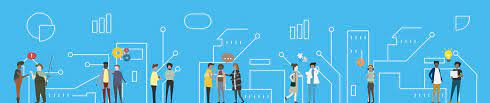

 <a id="1"></a>
# <p style="background-color:#627D78;font-family:newtimeroman;color:#D5CABD;font-size:150%;text-align:center;border-radius:20px 60px;">Importing Libraries</p>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import math
import folium
import plotly.express as px
from geopy.geocoders import Nominatim
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import warnings
warnings.filterwarnings("ignore")

<a id="2"></a>
# <p style="background-color:#627D78;font-family:newtimeroman;color:#D5CABD;font-size:150%;text-align:center;border-radius:20px 60px;">Loading Data</p>

In [ ]:
df=pd.read_csv('../input/kaggle-survey-2021/kaggle_survey_2021_responses.csv')

In [ ]:
df.head(10)

In [ ]:
df.shape

In [ ]:
df[['Q1','Q2']].value_counts().head(10)

#### Examination of the gender distribution between males and females

In [ ]:
title = df['Q2'][0]
title = title.replace("- Selected Choice","")
fig, ax  = plt.subplots(figsize=(16, 8))
fig.suptitle(title, fontsize = 20, font="Serif")
explode = (0.05, 0.4, 0.4, 0.5, 0.6)
labels = list(df.iloc[1:].Q2.value_counts().index)
sizes = df.iloc[1:].Q2.value_counts().values
ax.pie(sizes, explode=explode,startangle=60, labels=labels,autopct='%1.0f%%', pctdistance=0.7, colors=["#DE3163","#FA8072","#F08080","#6d6875","#5e6875"])
ax.add_artist(plt.Circle((0,0),0.4,fc='black'))
plt.show()

### Statical Pointis

In [ ]:
#between age and gender
px.box(df, x="Q2", y="Q1")

In [ ]:
px.violin(df, y="Q1", x="Q2", color="Q3")

In [ ]:
px.violin(df, y="Q1", x="Q2", color="Q3", box=True, points="all")

In [ ]:
px.funnel(df, x='Q1', y='Q2', color='Q3')

In [ ]:
df_responses = df.drop(0).reset_index(drop=True)
df_responses

In [ ]:
x = df['Q1']
plt.figure(figsize=(10,8))
ax = sns.countplot(x,color='#00ffff')
ax.set_xlabel(xlabel = 'Age of the Contributer', fontsize = 16)
ax.set_title(label = 'Distribution of Age of the Contributer', fontsize = 20)
plt.show()

In [ ]:
## horizontal bar graphs
def plotly_hBar(q, title, height=400):   
    fig = px.histogram(df.iloc[1:], 
                       y=q,
                       orientation='h',
                       width=700,
                       height=height,
                       histnorm='percent',
                       
                       )

    fig.update_layout(title=title, 
                      font_family="San Serif",
                      bargap=0.2,
                      barmode='group',
                      titlefont={'size': 28},
                      paper_bgcolor='#E6E6E6',
                      plot_bgcolor='#E6E6E6',                      
                      legend=dict(
                      orientation="v", 
                          y=1, 
                          yanchor="top", 
                          x=1.250, 
                          xanchor="right",)                 
                      ).update_yaxes(categoryorder='total ascending')
    fig.update_traces(marker_color='salmon')
    fig.update_layout(yaxis_title=None,
    autosize=False,
    margin=dict(
        l=250,
        r=50,
        b=50,
        t=100,
    ),
    )
    fig.update_xaxes(showgrid=True)
    fig.update_yaxes(showgrid=False)
    fig.show()   
    

## vertical bar graphs
def plotly_vBar(q, title):   
    fig = px.histogram(df.iloc[1:],
                       x=q,
                       orientation='v',
                       width=700,
                       height=450,
                       histnorm='percent',
                       )

    fig.update_layout(title=title, 
                      font_family="San Serif",
                      bargap=0.2,
                      barmode='group',
                      titlefont={'size': 28},
                      paper_bgcolor='#CD5C5C',
                      plot_bgcolor='#E6E6E6',
                      legend=dict(
                      orientation="v", 
                          y=1, 
                          yanchor="top", 
                          x=1.250, 
                          xanchor="right",)                 
                      ).update_xaxes(categoryorder='total descending')
    fig.update_traces(marker_color='seagreen')
    fig.update_layout(xaxis_title=None,
    autosize=False,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=100,
    ),
    )
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=True)
    fig.show() 

In [ ]:
title= "What is your gender? "
plotly_hBar("Q2", title=title)

In [ ]:
title= "What is your gender? "
plotly_hBar("Q1", title=title)

### The offer depends on the country of residence

In [ ]:
title= "<b>In which country do you currently reside? <b>"
plotly_hBar("Q3", title=title, height=900)

### highest level of formal education

In [ ]:
title= "<b>What is the highest level of formal education? <b>"
plotly_hBar("Q4", title=title)

In [ ]:
df.head(2)

In [ ]:
px.strip(df, x="Q1", y="Q2", orientation="h")